In [1]:
import unicodecsv
import os
path = 'C:\\Users\\aemra\\Documents\\Python\\Nanodegree'
os.chdir(path)
enrollments=[]
f=open('enrollments.csv','rb')
reader=unicodecsv.DictReader(f)

for row in reader:
    enrollments.append(row)
    
f.close()

enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [2]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [6]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students
len(enrollments)


1640

In [7]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)


1302

In [8]:
len(enrollments)


1640

In [9]:
unique_enrolled_students = get_unique_students(enrollments)
len(unique_enrolled_students)


1302

In [10]:
len(daily_engagement)


136240

In [11]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [12]:
unique_engagement_students = get_unique_students(daily_engagement)
len(unique_engagement_students)


1237

In [13]:
len(project_submissions)



3642

In [14]:
unique_project_submitters = get_unique_students(project_submissions)
len(unique_project_submitters)

743

In [15]:
daily_engagement[0]['account_key']

u'0'

In [16]:
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagement_students:
        print (enrollment)
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [17]:
count=0
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagement_students \
    and enrollment['join_date']!=enrollment['cancel_date']:
        count+=1
print (count)

3


In [18]:
for enrollment in enrollments:
    student=enrollment['account_key']
    if student not in unique_engagement_students \
    and enrollment['join_date']!=enrollment['cancel_date']:
        print (enrollment)

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


In [19]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [20]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [21]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


In [22]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

In [23]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

995

In [24]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days>=0

In [25]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [26]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print (len(paid_enrollments))
print (len(paid_engagement))
print (len(paid_submissions))

1293
134549
3618


In [27]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited']>0:
        engagement_record['has_visited']=1
    else:
        engagement_record['has_visited']=0

In [28]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [29]:
from collections import defaultdict
engagement_by_account=defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key=engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [30]:
total_minutes_by_account={}
for account_key,engagement_for_student in engagement_by_account.items():
    total_munite=0
    for engagement_record in engagement_for_student:
        total_munite+=engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key]=total_munite
    

In [31]:
import numpy as np
# Summarize the data about minutes spent in the classroom
total_minutes =list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

('Mean:', 306.70832675342825)
('Standard deviation:', 412.99693340852957)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)


In [32]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
        
max_minutes

3564.7332644989997

In [33]:
max_minutes

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print (engagement_record)

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, 'has_visited': 1, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163

In [34]:
total_lessons_by_account={}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lesson=0
    for engagement_record in engagement_for_student:
        total_lesson+=engagement_record['lessons_completed']
    total_lessons_by_account[account_key]=total_lesson

In [35]:
import numpy as np
# Summarize the data about minutes spent in the classroom
total_lessons =list(total_lessons_by_account.values())
print ('Mean:', np.mean(total_lessons))
print ('Standard deviation:', np.std(total_lessons))
print ('Minimum:', np.min(total_lessons))
print ('Maximum:', np.max(total_lessons))

('Mean:', 1.636180904522613)
('Standard deviation:', 3.0025612998294231)
('Minimum:', 0)
('Maximum:', 36)


In [36]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        data_points=list(data_points)
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [37]:
total_minutes_by_account = sum_grouped_items(engagement_by_account,
                                             'total_minutes_visited')


In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def describe_data(data):
    total_values=list(data)
    print ('Mean:', np.mean(total_values))
    print ('Standard deviation:', np.std(total_values))
    print ('Minimum:', np.min(total_values))
    print ('Maximum:', np.max(total_values))
    plt.hist(data,bins=20)

In [56]:
days_visited_by_account = sum_grouped_items(engagement_by_account,'has_visited')

('Mean:', 2.8673366834170855)
('Standard deviation:', 2.2551980029196814)
('Minimum:', 0)
('Maximum:', 7)


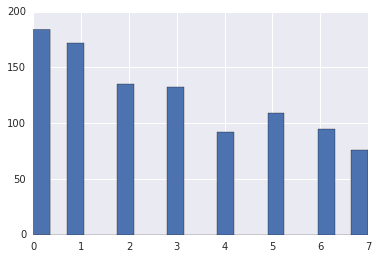

In [57]:
describe_data(days_visited_by_account.values())

In [58]:
subway_project_lesson_keys = ['746169184', '3176718735']

In [59]:
pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

647

In [60]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [61]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

In [62]:
print 'non-passing students:'
non_passing_minutes=sum_grouped_items

non-passing students:


non-passing students:
('Mean:', 143.32647426675584)
('Standard deviation:', 269.53861901149509)
('Minimum:', 0.0)
('Maximum:', 1768.5227493319999)


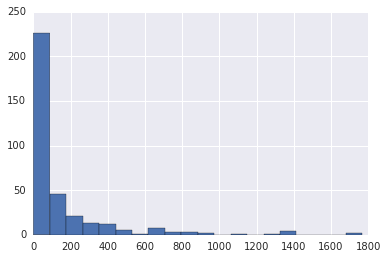

In [63]:
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())


non-passing students:
('Mean:', 143.32647426675584)
('Standard deviation:', 269.53861901149509)
('Minimum:', 0.0)
('Maximum:', 1768.5227493319999)


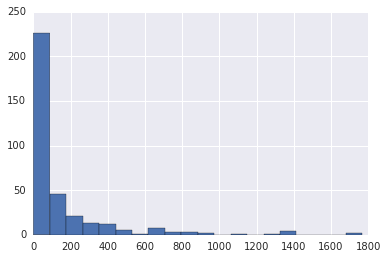

In [64]:
print 'non-passing students:'
non_passing_minutes = sum_grouped_items(
    non_passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(non_passing_minutes.values())

passing students:
('Mean:', 394.58604648350865)
('Standard deviation:', 448.4995193265521)
('Minimum:', 0.0)
('Maximum:', 3564.7332644989997)


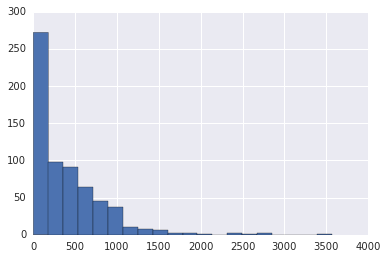

In [65]:

print 'passing students:'
passing_minutes = sum_grouped_items(
    passing_engagement_by_account,
    'total_minutes_visited'
)
describe_data(passing_minutes.values())


non-passing students:
('Mean:', 0.86206896551724133)
('Standard deviation:', 2.5491599418312028)
('Minimum:', 0)
('Maximum:', 27)


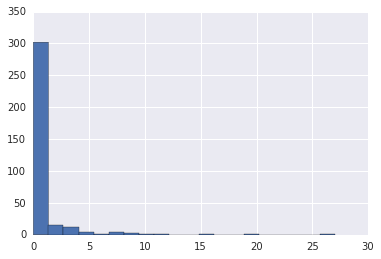

In [66]:

print 'non-passing students:'
non_passing_lessons = sum_grouped_items(
    non_passing_engagement_by_account,
    'lessons_completed'
)
describe_data(non_passing_lessons.values())

passing students:
('Mean:', 2.0525502318392581)
('Standard deviation:', 3.1422270555779344)
('Minimum:', 0)
('Maximum:', 36)


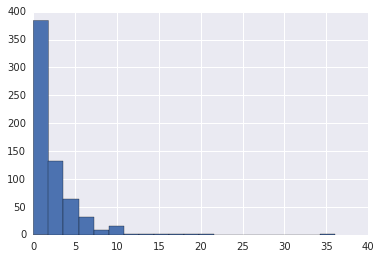

In [67]:
print 'passing students:'
passing_lessons = sum_grouped_items(
    passing_engagement_by_account,
    'lessons_completed'
)
describe_data(passing_lessons.values())


non-passing students:
('Mean:', 1.9051724137931034)
('Standard deviation:', 1.9057314413619049)
('Minimum:', 0)
('Maximum:', 7)


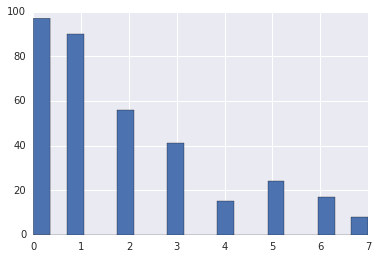

In [68]:
print 'non-passing students:'
non_passing_visits = sum_grouped_items(
    non_passing_engagement_by_account, 
    'has_visited'
)
describe_data(non_passing_visits.values())

passing students:
('Mean:', 3.3848531684698608)
('Standard deviation:', 2.2588214709184595)
('Minimum:', 0)
('Maximum:', 7)


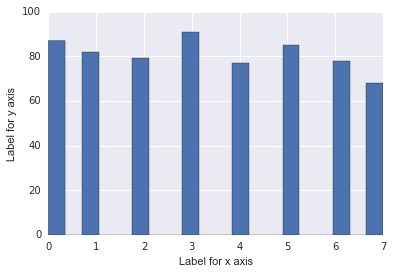

In [69]:
import seaborn as sns
print 'passing students:'
passing_visits = sum_grouped_items(
    passing_engagement_by_account,
    'has_visited'
)
describe_data(passing_visits.values())
plt.xlabel("Label for x axis")
plt.ylabel("Label for y axis")


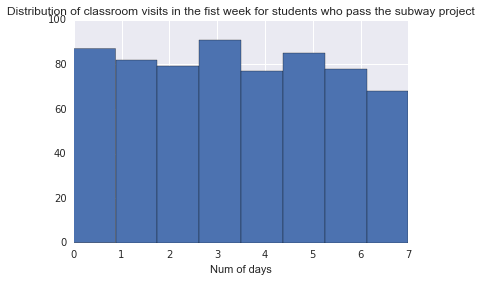

In [72]:
plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Num of days')
plt.title('Distribution of classroom visits in the fist week ' +
         'for students who pass the subway project')

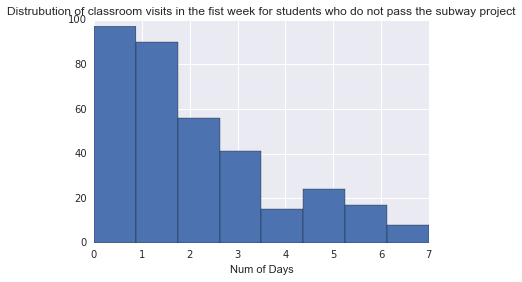

In [77]:
plt.hist(non_passing_visits.values(),bins=8)
plt.xlabel('Num of Days')
plt.title('Distrubution of classroom visits in the fist week '+
         'for students who do not pass the subway project')